In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/dataset/CompraDoPrimeiroAp.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,idade,salario,taxaDeJuros,entrada,precoDoApartamento,tempoDeEmprestimo,gastoMensal,score,statusTrabalhista
0,32,5000.0,4.2,28000.0,220000.0,15,2000.0,680,Unemployed
1,30,4000.0,3.9,25000.0,200000.0,25,1500.0,700,Part-Time
2,35,5500.0,4.5,32000.0,270000.0,20,2200.0,750,Freelancer
3,25,6000.0,4.0,30000.0,250000.0,30,2500.0,720,Contractor
4,42,6200.0,4.2,28000.0,230000.0,25,1800.0,680,Consultant


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               1051 non-null   int64  
 1   salario             1051 non-null   float64
 2   taxaDeJuros         1051 non-null   float64
 3   entrada             1051 non-null   float64
 4   precoDoApartamento  1051 non-null   float64
 5   tempoDeEmprestimo   1051 non-null   int64  
 6   gastoMensal         1051 non-null   float64
 7   score               1051 non-null   int64  
 8   statusTrabalhista   1051 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 74.0+ KB


In [5]:
df.describe()

,idade,salario,taxaDeJuros,entrada,precoDoApartamento,tempoDeEmprestimo,gastoMensal,score
count,1051.000000,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000
mean,29.556613,6900.142721,5.126622,26623.882017,1.558949e+06,27.192198,3185.870599,711.337774
std,3.368111,763.932482,0.805953,3036.740979,1.335579e+06,2.806994,374.701695,24.981881
min,23.000000,4000.000000,3.800000,15000.000000,1.500000e+05,15.000000,1500.000000,610.000000
25%,28.000000,6800.000000,4.600000,25000.000000,8.200000e+05,26.000000,3000.000000,700.000000
50%,29.000000,7000.000000,4.800000,26000.000000,9.700000e+05,28.000000,3200.000000,720.000000
75%,31.000000,7300.000000,5.500000,28000.000000,1.800000e+06,29.000000,3400.000000,725.000000
max,55.000000,8500.000000,7.200000,40000.000000,5.600000e+06,33.000000,4200.000000,750.000000


Análise Exploratória dos Dados

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

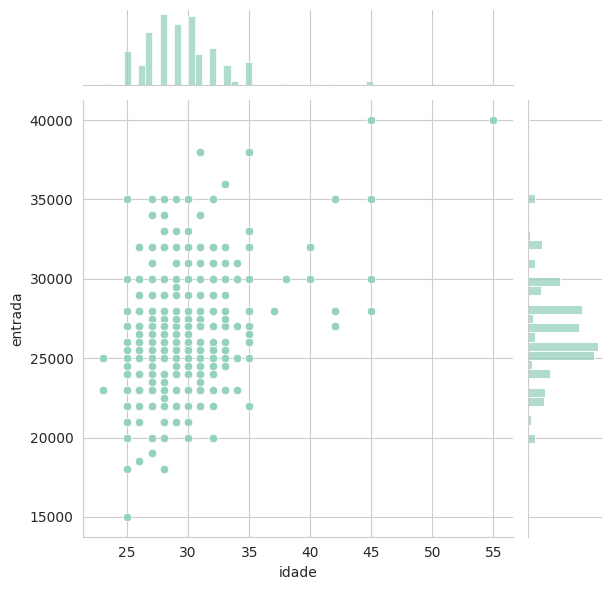

In [7]:
sns.jointplot(x='idade', y='entrada', data=df)

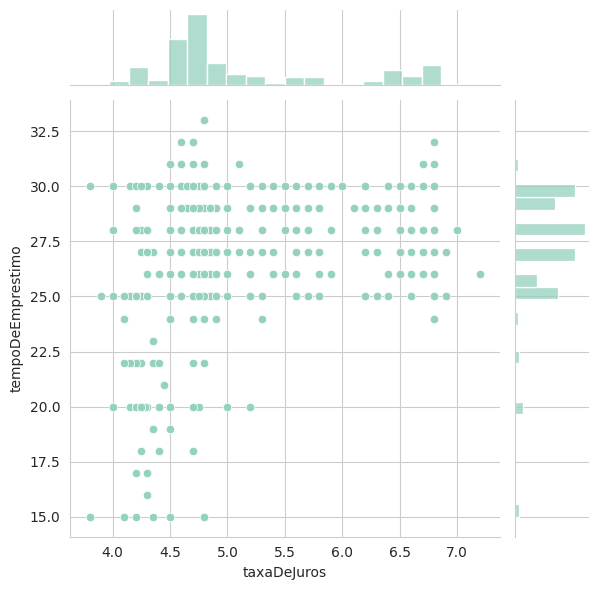

In [8]:
sns.jointplot(x='taxaDeJuros', y='tempoDeEmprestimo', data=df)

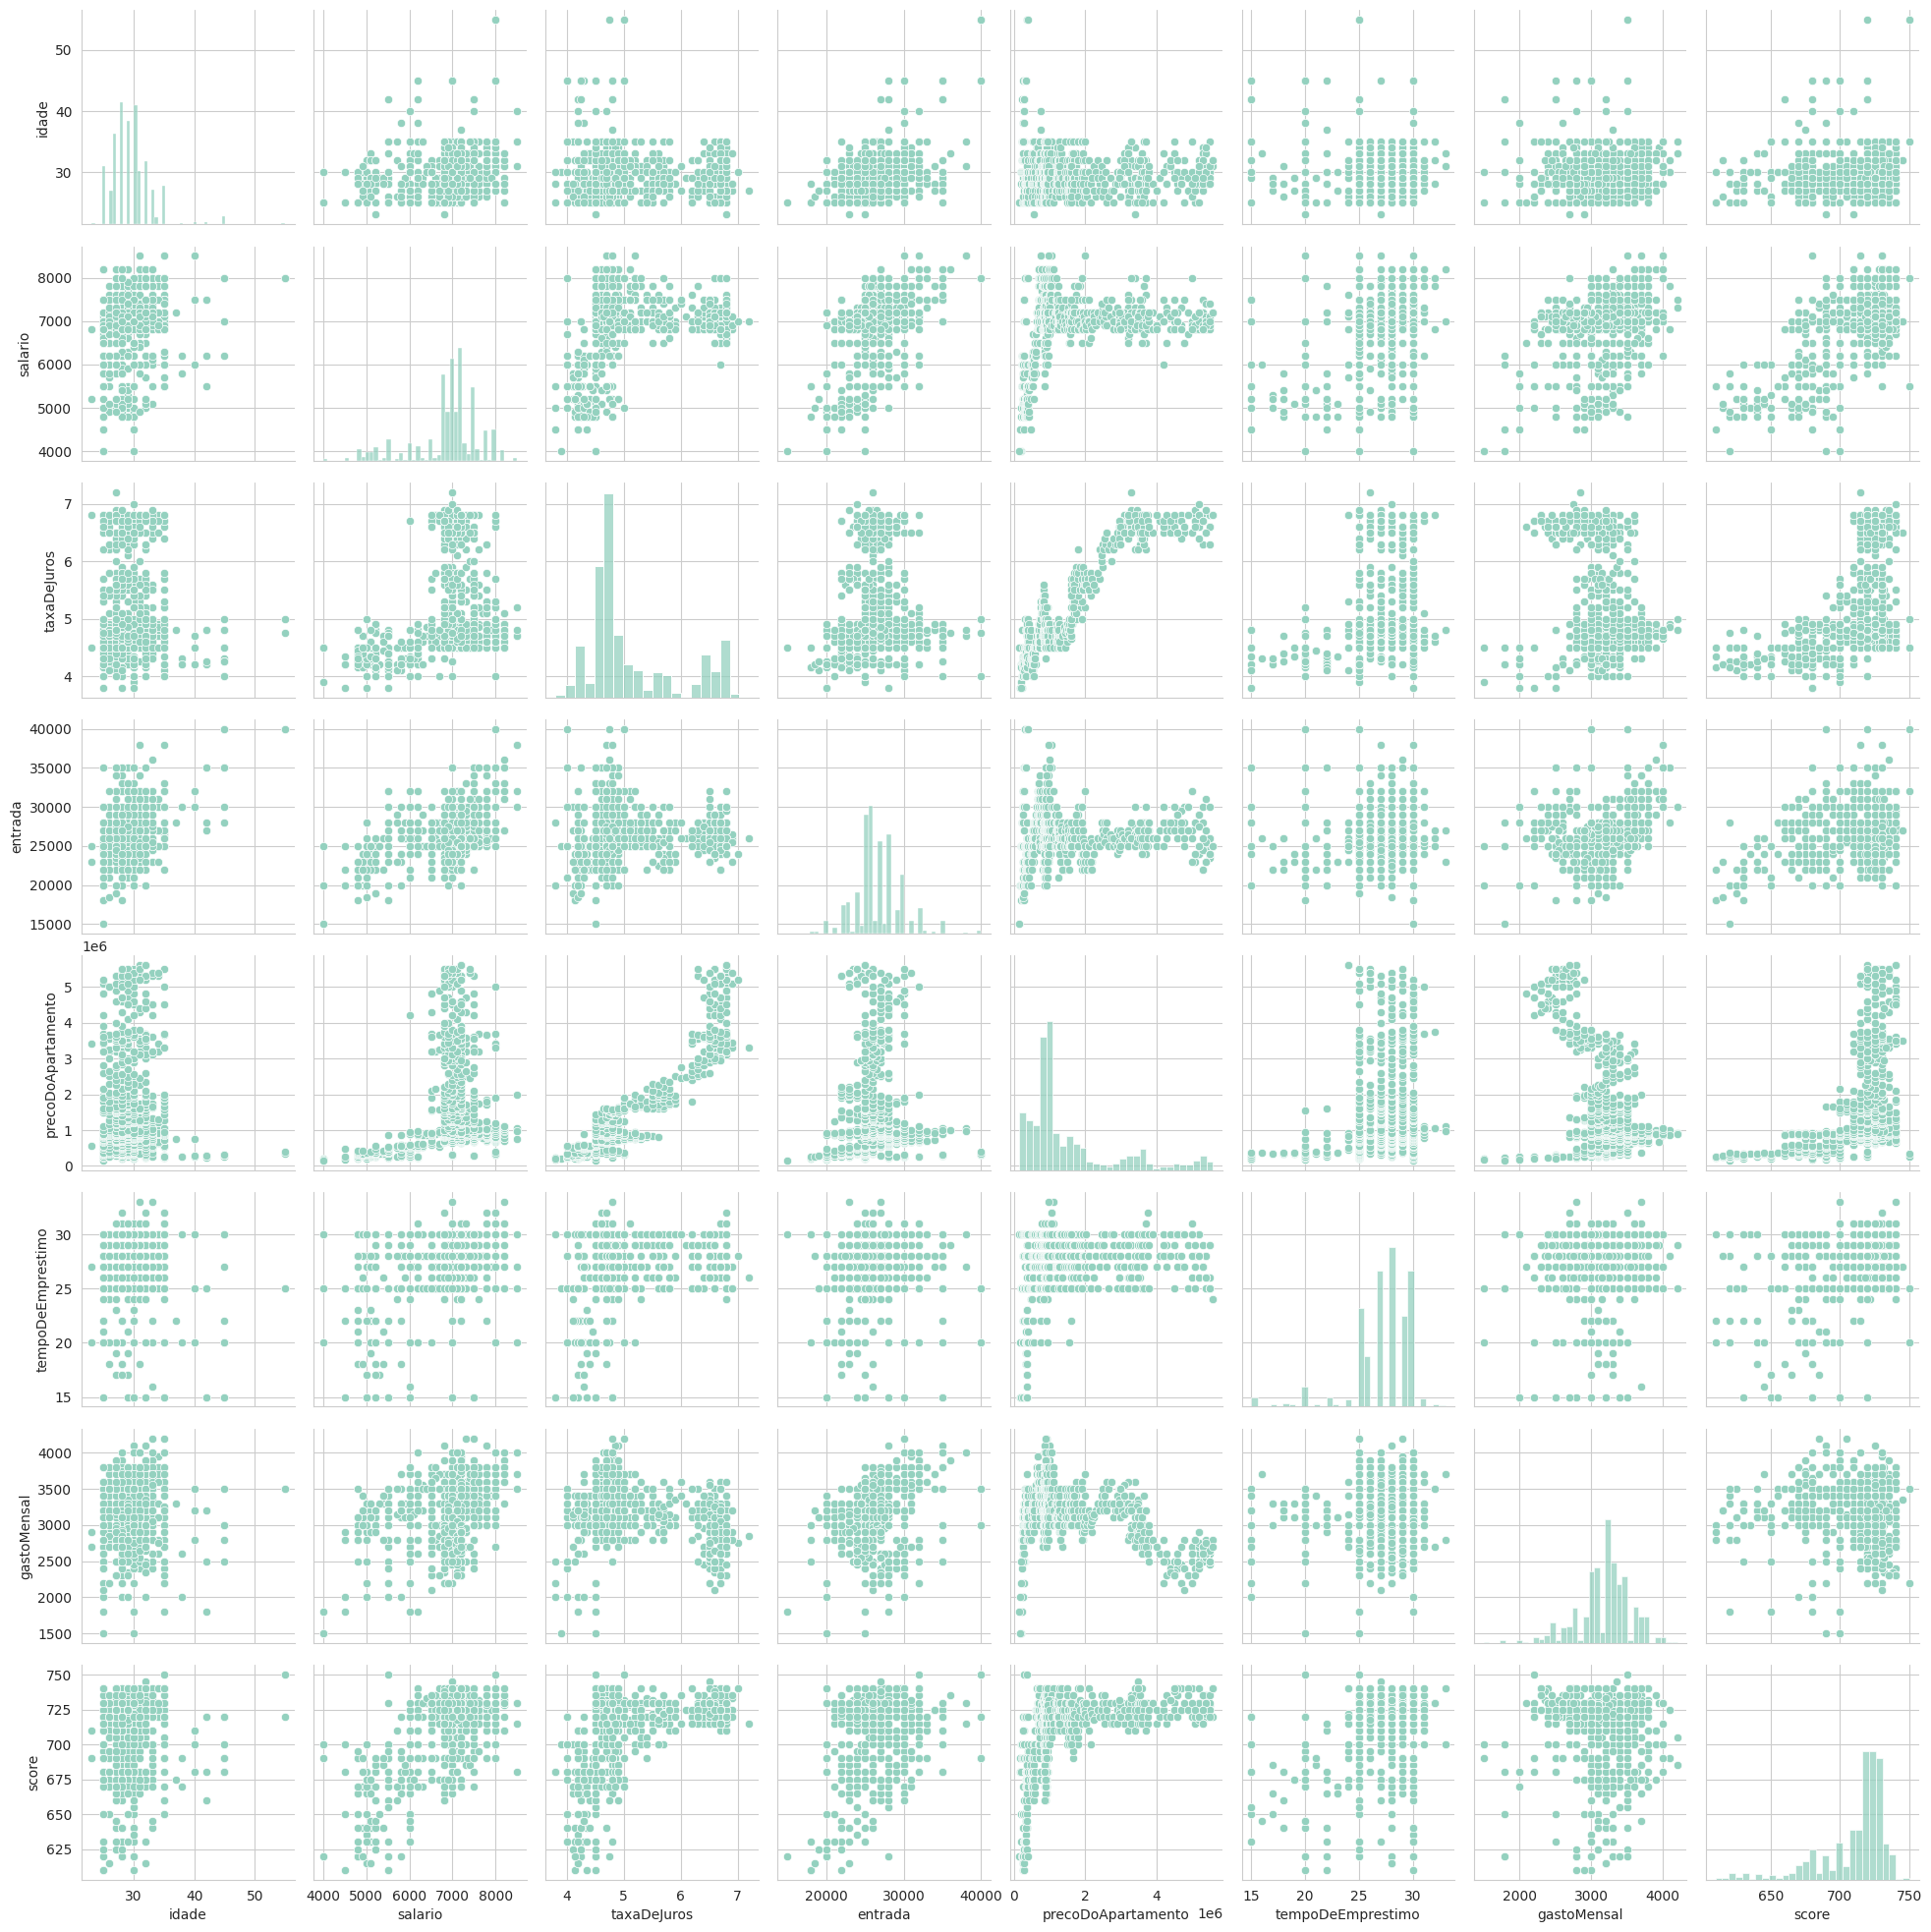

In [9]:
sns.pairplot(df)

Treinamento e teste de dados

In [10]:
y = df['score']
# X = clientes.drop(columns='Yearly Amount Spent')
X = df.drop(columns=['idade', 'gastoMensal', 'statusTrabalhista'])

In [11]:
X.head()

,salario,taxaDeJuros,entrada,precoDoApartamento,tempoDeEmprestimo,score
0,5000.0,4.2,28000.0,220000.0,15,680
1,4000.0,3.9,25000.0,200000.0,25,700
2,5500.0,4.5,32000.0,270000.0,20,750
3,6000.0,4.0,30000.0,250000.0,30,720
4,6200.0,4.2,28000.0,230000.0,25,680


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
X_train.head()

,salario,taxaDeJuros,entrada,precoDoApartamento,tempoDeEmprestimo,score
585,7200.0,4.6,24000.0,1020000.0,31,710
417,6900.0,4.8,30000.0,880000.0,25,705
793,7200.0,5.6,26000.0,1700000.0,29,725
904,7100.0,6.5,27000.0,3500000.0,27,730
260,7500.0,5.2,26000.0,810000.0,25,725


Treinando

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X=X_train, y=y_train)

LinearRegression()

In [18]:
print(f'Coeficientes: \n{lm.coef_}')
print(X.columns)

Coeficientes: 
[ 8.87081401e-15 -5.71648306e-15 -1.23032653e-15 -1.33492392e-18
  1.72610697e-16  1.00000000e+00]
Index(['salario', 'taxaDeJuros', 'entrada', 'precoDoApartamento',
       'tempoDeEmprestimo', 'score'],
      dtype='object')


predição

In [19]:
predicoes = lm.predict(X_test)

Text(0, 0.5, 'Predicoes Y')

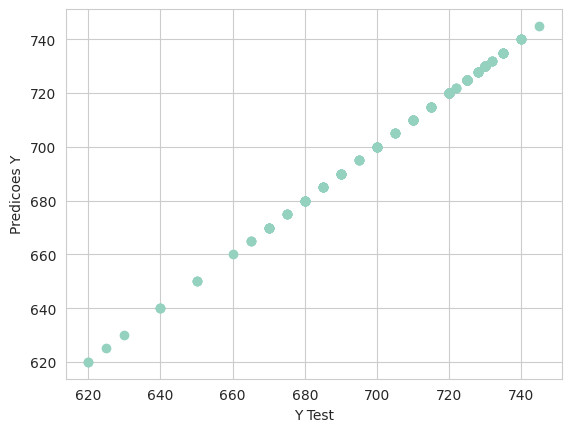

In [20]:
plt.scatter(y_test,predicoes)
plt.xlabel('Y Test')
plt.ylabel('Predicoes Y')

O gráfico de dispersão das previsões versus os valores reais (Y Test) é outro bom indicador da performance do modelo de regressão linear. Aqui está a análise com base no gráfico fornecido:

Análise do Gráfico de Dispersão
Correlação Perfeita:

O gráfico mostra uma linha quase perfeita onde as previsões (Predicoes Y) estão alinhadas com os valores reais (Y Test). Isso indica que o modelo está prevendo os valores com altíssima precisão.
A linha reta sugere que a relação entre as variáveis independentes e a variável dependente é bem modelada pela regressão linear.
Ausência de Dispersão:

A ausência de dispersão significativa ao redor da linha reta indica que os erros de previsão são mínimos e consistentes.
Este comportamento é extremamente raro em modelos de regressão e sugere uma precisão quase ideal nas previsões.
Conclusão:
O gráfico de dispersão confirma as métricas de erro baixíssimas e a análise do histograma dos resíduos. O modelo de regressão linear está performando de forma excepcional, com previsões que praticamente coincidem com os valores reais.

Considerações Finais:
Possível Overfitting: Apesar dos resultados impressionantes, é importante garantir que o modelo não esteja superajustado aos dados de treinamento. Técnicas como a validação cruzada podem ajudar a confirmar a generalização do modelo.
Verificação dos Dados: Confirme se os dados de entrada estão corretos e não contêm valores duplicados ou anomalias que possam influenciar os resultados.

avaliação do modelo
**Calculo do Erro Médio Absoluto, Erro Quadrático Médio e o Erro Quadrático Médio da Raiz.**


In [21]:
from sklearn import metrics

In [22]:
print(f'MAE: {metrics.mean_absolute_error(y_test, predicoes)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predicoes)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predicoes))}')

MAE: 4.0887687047663486e-12
MSE: 2.8912261041561856e-23
RMSE: 5.377012278353273e-12


Os resultados das métricas de erro indicam que o modelo de regressão linear possui uma precisão extremamente alta, com erros praticamente nulos. Vamos analisar cada uma dessas métricas com mais detalhes:

MAE (Mean Absolute Error): 4.0887687047663486e-12

Esse valor é extremamente pequeno, sugerindo que a média das diferenças absolutas entre as previsões e os valores reais é quase zero.
MSE (Mean Squared Error): 2.8912261041561856e-23

O MSE também é extremamente baixo, o que significa que a média das diferenças ao quadrado entre as previsões e os valores reais é praticamente zero. Isso indica que não há grandes erros de previsão.
RMSE (Root Mean Squared Error): 5.377012278353273e-12

O RMSE, que é a raiz quadrada do MSE, também é muito pequeno. Isso reforça a indicação de que o modelo está prevendo os valores com altíssima precisão.


residuos

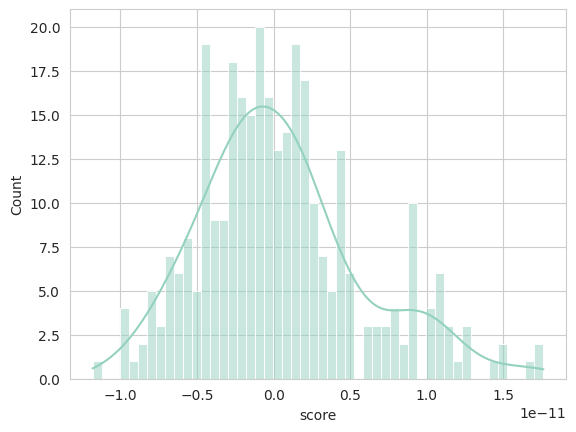

In [23]:
sns.histplot((y_test-predicoes), bins=50, kde=True);

A análise do histograma dos resíduos (diferença entre os valores reais e as previsões) nos fornece informações adicionais sobre a performance do modelo. Aqui está a análise baseada no gráfico fornecido:

Análise do Histograma dos Resíduos
Distribuição dos Resíduos:

O histograma parece mostrar uma distribuição aproximadamente normal, centrada em torno de zero. Isso é um bom sinal, pois sugere que os resíduos (erros) do modelo não apresentam um viés sistemático e são distribuídos de forma simétrica em torno do zero.
A linha de densidade (KDE) também reforça a ideia de que os resíduos seguem uma distribuição normal.
Magnitude dos Resíduos:

Os resíduos variam em torno de - 1 x 10 -¹¹ a 1.5 x 10-¹¹, o que é consistente com os valores extremamente baixos de MAE, MSE e RMSE observados.
A maior concentração de resíduos está próxima de zero, indicando que a maioria das previsões do modelo estão muito próximas dos valores reais.
Conclusão:
O histograma dos resíduos confirma a interpretação anterior de que o modelo está performando muito bem, com a maioria dos erros de previsão sendo muito pequenos e distribuídos de forma simétrica em torno do zero.

